# Simulación de APR

## Caso Benchmark

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Definición de variables
N = 100
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 100 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 50 # Segment 1 length and position
S2_length = 50 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
  
# Cambio de diámetros para el segundo caso
D[0:S1_pos] = 0.3048
D[S1_pos:S2_pos+1] = 0.3556

for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
    
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube
    return ir

n=1
f_min = 3500
f_max = 4500
print("rango de frecuencia: ", f_min, " - ", f_max, " Hz")
ndata = int(f_max*2 + (f_max*0.1))
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t = np.arange(ndata)/fs
w=np.linspace(f_min,f_max,ndata)
response1=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para primer caso
for i in range (0,ndata):
    response1[i]=iir(w[i])
    
ift1=np.fft.ifft(response1)
# Cambio de diámetros para el segundo caso
D[0:S1_pos] = 0.3556
D[S1_pos:S2_pos+1] = 0.3048
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]

response2=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para segundo caso
for i in range (0,ndata):
    response2[i]=iir(w[i])


ift2=np.fft.ifft(response2)


rango de frecuencia:  3500  -  4500  Hz


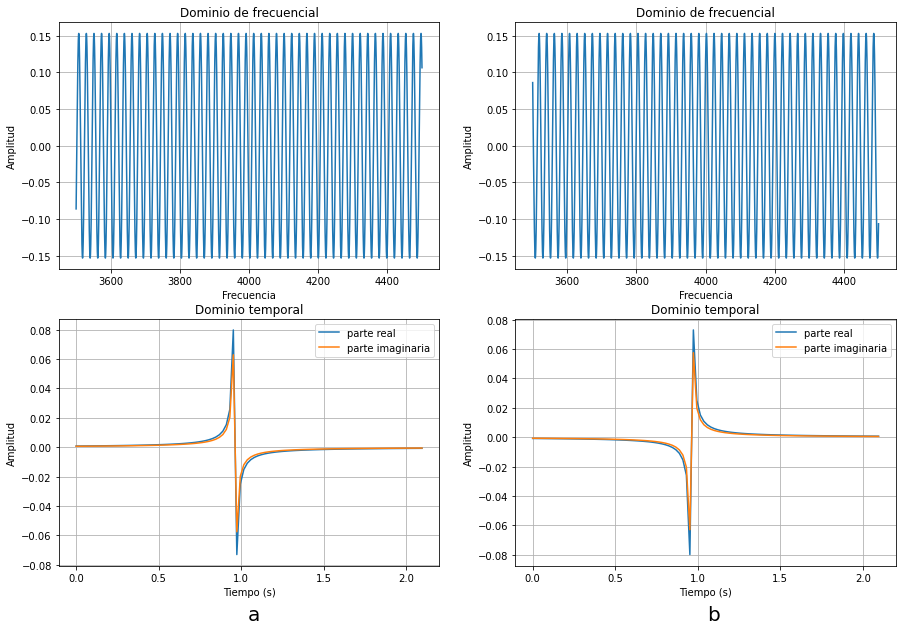

In [3]:
# Graficar subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
# Primer columna
line1, = axs[1,0].plot(t[:100], np.real(ift1)[:100], label='parte real')
line2, = axs[1,0].plot(t[:100], np.imag(ift1)[:100], label='parte imaginaria')
axs[0,0].plot(w, response1)
axs[0,0].set_title("Dominio de frecuencial")
axs[0,0].set_xlabel('Frecuencia')
axs[0,0].set_ylabel('Amplitud')
axs[0,0].grid()

axs[1,0].set_title("Dominio temporal")
axs[1,0].set_xlabel('Tiempo (s)')
axs[1,0].set_ylabel('Amplitud')
axs[1,0].grid()
axs[1,0].legend()

# Segunda columna
line3, = axs[1,1].plot(t[:100], np.real(ift2)[:100], label='parte real')
line4, = axs[1,1].plot(t[:100], np.imag(ift2)[:100], label='parte imaginaria')
axs[0,1].plot(w, response2)
axs[0,1].set_title("Dominio de frecuencial")
axs[0,1].set_xlabel('Frecuencia')
axs[0,1].set_ylabel('Amplitud')
axs[0,1].grid()

axs[1,1].set_title("Dominio temporal")
axs[1,1].set_xlabel('Tiempo (s)')
axs[1,1].set_ylabel('Amplitud')
axs[1,1].grid()
axs[1,1].legend()

# Agregar textos
fig.text(0.3, 0.05, 'a', fontsize=20)
fig.text(0.725, 0.05, 'b', fontsize=20)


plt.show()

## Frecuencias

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de variables
N = 100
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
Lp = 10
L[0:N] = Lp/N  # Segment length
S1_length = 5 # Segment 1 length and position
S2_length = 1 # Segment length
S3_length = 4 # Segment length
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
  
# Cambio de diámetros para el segundo caso
D[0:S1_pos] = 0.3556
D[S1_pos:S2_pos] = 0.35306
D[S2_pos:S3_pos+1] = 0.3556

for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
    
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
    #ir = Mp[1,0]/Mp[0,0] 
    ir = (Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir

n=1
f_min = 3000
f_max = 4000
print("rango de frecuencia: ", f_min, " - ", f_max, " Hz")
ndata = int(f_max*2 + (f_max*0.1))
print("frecuencia de muestreo: ", ndata)
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t = np.arange(ndata)/fs
w=np.linspace(f_min,f_max,ndata)
response1=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para primer caso
for i in range (0,ndata):
    response1[i]=iir(w[i])
    
ift1=np.fft.ifft(response1)

f_min = (n*c)/(4*Lp)
f_max = 4000
print("rango de frecuencia: ", f_min, " - ", f_max, " Hz")
ndata = int(f_max*2 + (f_max*0.1))
print("frecuencia de muestreo: ", ndata)
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t2 = np.arange(ndata)/fs
w2=np.linspace(f_min,f_max,ndata)
response2=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para primer caso
for i in range (0,ndata):
    response2[i]=iir(w2[i])
    
ift2=np.fft.ifft(response2)

rango de frecuencia:  3000  -  4000  Hz
frecuencia de muestreo:  8400
rango de frecuencia:  8.575  -  4000  Hz
frecuencia de muestreo:  8400


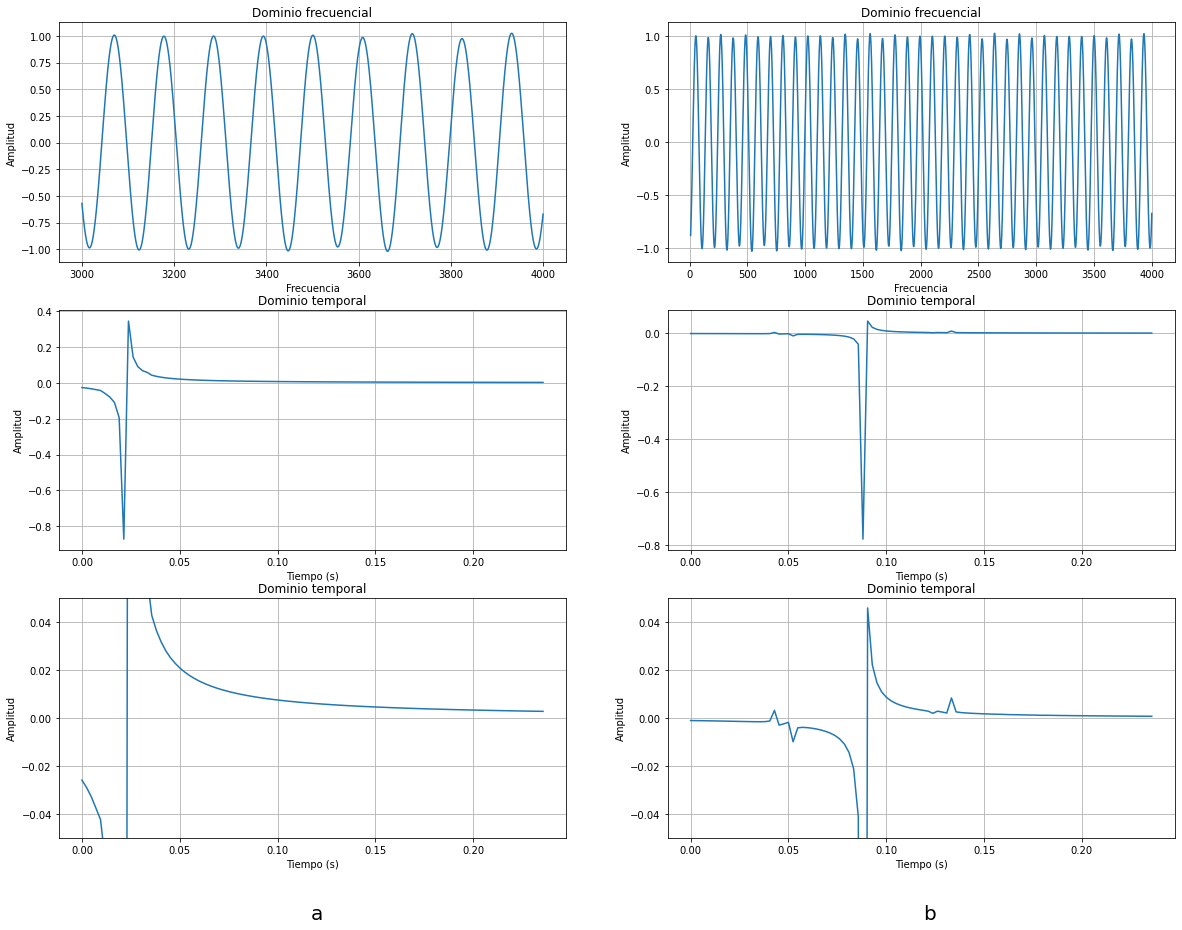

In [6]:
lim1 = 100
lim2 = 100

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

# Primer columna
axs[0,0].plot(w, response1)
axs[0,0].set_title("Dominio frecuencial")
axs[0,0].set_xlabel('Frecuencia')
axs[0,0].set_ylabel('Amplitud')
axs[0,0].grid()

line1, = axs[1,0].plot(t[:lim1], np.real(ift1)[:lim1], label='parte real')
#line2, = axs[1,0].plot(t[:lim1], np.imag(ift1)[:lim1], label='parte imaginaria')
axs[1,0].set_title("Dominio temporal")
axs[1,0].set_xlabel('Tiempo (s)')
axs[1,0].set_ylabel('Amplitud')
axs[1,0].grid()

line3, = axs[2,0].plot(t[:lim1], np.real(ift1)[:lim1], label='parte real')
#line4, = axs[2,0].plot(t[:lim1], np.imag(ift1)[:lim1], label='parte imaginaria')
axs[2,0].set_ylim(-0.05,0.05)
axs[2,0].set_title("Dominio temporal")
axs[2,0].set_xlabel('Tiempo (s)')
axs[2,0].set_ylabel('Amplitud')
axs[2,0].grid()

# Segunda columna
axs[0,1].plot(w2, response2)
axs[0,1].set_title("Dominio frecuencial")
axs[0,1].set_xlabel('Frecuencia')
axs[0,1].set_ylabel('Amplitud')
axs[0,1].grid()

line5, = axs[1,1].plot(t2[:lim2], np.real(ift2)[:lim2], label='parte real')
#line6, = axs[1,1].plot(t2[:lim2], np.imag(ift2)[:lim2], label='parte imaginaria')
axs[1,1].set_title("Dominio temporal")
axs[1,1].set_xlabel('Tiempo (s)')
axs[1,1].set_ylabel('Amplitud')
axs[1,1].grid()

line7, = axs[2,1].plot(t2[:lim2], np.real(ift2)[:lim2], label='parte real')
#line8, = axs[2,1].plot(t2[:lim2], np.imag(ift2)[:lim2], label='parte imaginaria')
axs[2,1].set_ylim(-0.05,0.05)
axs[2,1].set_title("Dominio temporal")
axs[2,1].set_xlabel('Tiempo (s)')
axs[2,1].set_ylabel('Amplitud')
axs[2,1].grid()

# Agregar letra "a" y "b" a cada columna
fig.text(0.3, 0.05, 'a', fontsize=20)
fig.text(0.725, 0.05, 'b', fontsize=20)

plt.show()

## Coeficiente de atenuación

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definición de variables
N = 100
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
Lp = 1
L[0:N] = Lp/N  # Segment length
eta = 1.8e-5 #Pa*s a una temperatura de 20°C. coeficiente de viscosidad de corte del aire
Cp = 1005 #J/(kg·K) calor especifico del aire a presion constante
kappa = 0.026  # W/(m K)  conductividad térmica del aire
gamma = 1.4  # relacion de los principales calores especificos del aire
tau = 293.15  # temperatura en Kelvin
D1 = 0.03556
D2 = 0.03048
r = D1/2  # radio del conducto
S1_length = 5 # Segment 1 length and position
S2_length = 5 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")

# Cambio de diámetros para el segundo caso
D[0:S1_pos] = D1
D[S1_pos:S2_pos+1] = D2

for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]

# Ecuaciones

n=1
f_min = (n*c)/(4*Lp)
f_max = 320000
print("rango de frecuencia: ", f_min, " - ", f_max, " Hz")
ndata = int(f_max*2 + (f_max*0.1))
print("frecuencia de muestreo: ", ndata)
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t = np.arange(ndata)/fs
w=np.linspace(f_min,f_max,ndata)

def calculate_attn_coeffs(r, rho, eta, Cp, kappa, gamma, f_min, f_max, ndata):
    c = 343.2  # velocidad del sonido en el aire a 20°C en m/s
    w = np.linspace(f_min, f_max, ndata)  # rango de frecuencias en Hz
    alpha_spec = 0.01*np.ones_like(w)  # atenuación específica constante
    attn_coeffs = []
    for i in range(len(w)):
        omega = 2*math.pi*w[i]  # frecuencia angular
        r_v = math.sqrt(omega*rho/eta)*r  # relacion entre el radio del conducto y la capa limite viscosa
        nu = math.sqrt(Cp*eta/kappa)  # constante termodinamica
        D = (gamma-1)/nu  # coeficiente termodinamico
        A = 1/math.sqrt(2)*(1+D)
        B = 1+D-D/(2*nu)-D**2/2
        C = 1/math.sqrt(2)*(7/8+D-D/(2*nu)-D**2/2-D/(8*nu**2)+D**2/(2*nu)+D**3/2)
        alpha = omega/math.sqrt(2)/c*(A/r_v+B/r_v**2+C/r_v**3) + alpha_spec[i] # atenuacion dependiente de la frecuencia
        nu_p = omega/c*(1+A/r_v-C/r_v**3)  # velocidad de fase
        Gamma = alpha + 1j*omega/nu_p  # numero de onda complejo
        attn_coeffs.append((alpha, Gamma))
    return attn_coeffs


def calculate_weighted_attenuation(attn_coeffs):
    # Calcula el coeficiente de atenuación ponderado para los coeficientes de atenuación dados

    # Calcula la suma de los cuadrados de los coeficientes de atenuación
    squared_attenuations = np.sum([np.abs(coeff[0])**2 for coeff in attn_coeffs])

    # Calcula la raíz cuadrada de la suma, dividiendo por el número total de frecuencias
    weighted_attenuation = np.sqrt(squared_attenuations / len(attn_coeffs))

    return weighted_attenuation

attn_coeffs = calculate_attn_coeffs(r, rho, eta, Cp, kappa, gamma, f_min, f_max, ndata)
weighted_attenuation = calculate_weighted_attenuation(attn_coeffs)


def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(weighted_attenuation*L[j])
        Mdelay[1,1]=np.exp(-weighted_attenuation*L[j])
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
    #ir = Mp[1,0]/Mp[0,0] 
    ir = (Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir


response1=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para primer caso
for i in range (0,ndata):
    response1[i]=iir(w[i])
    
ift1=np.fft.ifft(response1)

rango de frecuencia:  85.75  -  320000  Hz
frecuencia de muestreo:  672000


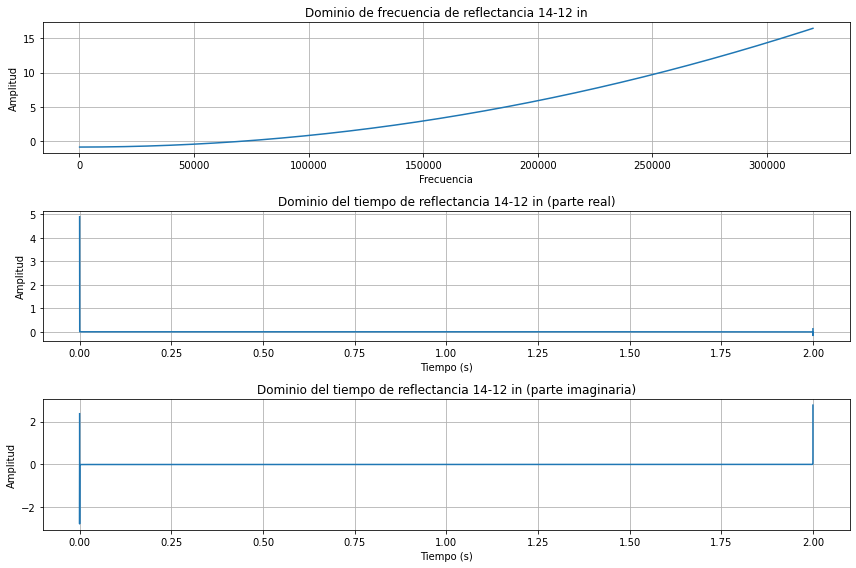

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
# Primer columna
lim = 672000
axs[0].plot(w[:], response1[:])
axs[0].set_title("Dominio de frecuencia de reflectancia 14-12 in")
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Amplitud')
axs[0].grid()

axs[1].plot(t[:], np.real(ift1)[:])
axs[1].set_title("Dominio del tiempo de reflectancia 14-12 in (parte real)")
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid()

axs[2].plot(t[:], np.imag(ift1)[:])
axs[2].set_title("Dominio del tiempo de reflectancia 14-12 in (parte imaginaria)")
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Amplitud')
axs[2].grid()


plt.tight_layout()
plt.show()

### Condiciones de frontera

In [ ]:
# Condición de frontera semi-infinita
N = 50
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 10 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 5 # Segment 1 length and position
S2_length = 5 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
  

D[0:S1_pos] = 0.3048
D[S1_pos:S2_pos+1] = 0.3556

for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
    
def iir_semiinfinite(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube
    return ir

n=1
f_min = (n*c)/(4*Lp)
f_max = 4000
print("rango de frecuencia: ", f_min, " - ", f_max, " Hz")
ndata = int(f_max*2 + (f_max*0.1))
print("frecuencia de muestreo: ", ndata)
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t = np.arange(ndata)/fs
w=np.linspace(f_min,f_max,ndata)
response1=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para primer caso
for i in range (0,ndata):
    response1[i]=iir_semiinfinite(w[i])
    
ift1=np.fft.ifft(response1)

# Conición de frontera abierta
def iir_open(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir

response2=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para primer caso
for i in range (0,ndata):
    response2[i]=iir_open(w[i])

ift2=np.fft.ifft(response2)




In [ ]:
lim=150
# Graficar subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
# Primer columna
axs[0,0].plot(w, response1)
axs[0,0].set_title("Dominio de frecuencia de reflectancia 14-12 in")
axs[0,0].set_xlabel('Frecuencia')
axs[0,0].set_ylabel('Amplitud')
axs[0,0].grid()

axs[1,0].plot(t[:lim], np.real(ift1)[:lim])
axs[1,0].set_title("Dominio del tiempo de reflectancia 14-12 in (parte real)")
axs[1,0].set_xlabel('Tiempo (s)')
axs[1,0].set_ylabel('Amplitud')
axs[1,0].grid()

axs[2,0].plot(t[:lim], np.imag(ift1)[:lim])
axs[2,0].set_title("Dominio del tiempo de reflectancia 14-12 in (parte imaginaria)")
axs[2,0].set_xlabel('Tiempo (s)')
axs[2,0].set_ylabel('Amplitud')
axs[2,0].grid()

# Segunda columna
axs[0,1].plot(w, response2)
axs[0,1].set_title("Dominio de frecuencia de reflectancia 12-14 in")
axs[0,1].set_xlabel('Frecuencia')
axs[0,1].set_ylabel('Amplitud')
axs[0,1].grid()

axs[1,1].plot(t[:lim], np.real(ift2)[:lim])
axs[1,1].set_title("Dominio del tiempo de reflectancia 12-14 in (parte real)")
axs[1,1].set_xlabel('Tiempo (s)')
axs[1,1].set_ylabel('Amplitud')
axs[1,1].grid()

axs[2,1].plot(t[:lim], np.imag(ift2)[:lim])
axs[2,1].set_title("Dominio del tiempo de reflectancia 12-14 in (parte imaginaria)")
axs[2,1].set_xlabel('Tiempo (s)')
axs[2,1].set_ylabel('Amplitud')
axs[2,1].grid()


plt.tight_layout()
plt.show()

In [ ]:
# Definición de variables
N = 50
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 12 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 4 # Segment 1 length and position
S2_length = 4 # Segment length
S3_length = 4 # Segment length
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
  
# Cambio de diámetros para el segundo caso
D[0:S1_pos] = 0.3048
D[S1_pos:S2_pos+1] = 0.3556
D[S2_pos:S3_pos+1] = 0.3048

for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
    
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube
    return ir

n=1
f_min = (n*c)/(4*Lp)
print(f_min)
f_max = 4000
ndata = int(f_max*2 + (f_max*0.1))
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t = np.arange(ndata)/fs
w=np.linspace(f_min,f_max,ndata)
response1=np.zeros(ndata,dtype=complex)

# Cálculo de reflectancia para primer caso
for i in range (0,ndata):
    response1[i]=iir(w[i])
    
ift1=np.fft.ifft(response1)

# Graficar subplots



In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
# Primer columna
lim = 500
axs[0].plot(w[:lim], response1[:lim])
axs[0].set_title("Dominio de frecuencia de reflectancia 14-12 in")
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Amplitud')
axs[0].grid()

axs[1].plot(t[:lim], np.real(ift1)[:lim])
axs[1].set_title("Dominio del tiempo de reflectancia 14-12 in (parte real)")
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid()

axs[2].plot(t[:lim], np.imag(ift1)[:lim])
axs[2].set_title("Dominio del tiempo de reflectancia 14-12 in (parte imaginaria)")
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Amplitud')
axs[2].grid()


plt.tight_layout()
plt.show()

In [ ]:
N = 50
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 10 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 5 # Segment 1 length and position
S2_length = 5 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.3556
D[S1_pos:S2_pos+1] = 0.3048
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube
    return ir
n=1
f_min = (n*c)/(4*Lp)
f_max = 4000
ndata = int(f_max*2 + (f_max*0.1))
print(ndata)
w=np.linspace(f_min,f_max,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t = np.arange(ndata)/fs

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

axs[0].plot(w, response)
axs[0].set_title("Dominio de frecuencia de reflectancia")
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Amplitud')
axs[0].grid()

axs[1].plot(t[:100], np.real(ift)[:100])
axs[1].set_title("Dominio del tiempo de reflectancia (parte real)")
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid()

axs[2].plot(t[:100], np.imag(ift)[:100])
axs[2].set_title("Dominio del tiempo de reflectancia (parte imaginaria)")
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Amplitud')
axs[2].grid()

plt.tight_layout()
plt.show()

In [ ]:
N = 50
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 10 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 5 # Segment 1 length and position
S2_length = 5 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.3048 
D[S1_pos:S2_pos+1] = 0.3556
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube
    return ir
n=1
f_min = (n*c)/(4*Lp)
f_max = 4000
ndata = int(f_max*2 + (f_max*0.1))
print(ndata)
w=np.linspace(f_min,f_max,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)
fs = (f_max*2 + (f_max*0.1))/(2*Lp)
t = np.arange(ndata)/fs

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

axs[0].plot(w, response)
axs[0].set_title("Dominio de frecuencia de reflectancia")
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Amplitud')
axs[0].grid()

axs[1].plot(t[:100], np.real(ift)[:100])
axs[1].set_title("Dominio del tiempo de reflectancia (parte real)")
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid()

axs[2].plot(t[:100], np.imag(ift)[:100])
axs[2].set_title("Dominio del tiempo de reflectancia (parte imaginaria)")
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Amplitud')
axs[2].grid()

plt.tight_layout()
plt.show()

In [ ]:
N = 50
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 1 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.5 # Segment 1 length and position
S2_length = 0.5 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0508
D[S1_pos:S2_pos+1] = 0.0762
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
f_min = 85
f_max = 4000
ndata = int(f_max*2 + (f_max*0.1))
print(ndata)
w=np.linspace(f_min,f_max,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift[0:50]))
plt.title("Reflactance time domain(Real part)")
plt.figure()
plt.plot(np.imag(ift[0:50]))
plt.title("Reflactance time domain(Imaginary part)")
plt.figure()

### 2 Secciones

In [ ]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.310 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos+1] = 0.00945
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube
    return ir
ndata=100000
w=np.linspace(0,100000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift[0:1000]))
plt.title("Reflactance time domain(Real part)")
plt.figure()
plt.plot(np.imag(ift[0:1000]))
plt.title("Reflactance time domain(Imaginary part)")
plt.figure()

### 3 Secciones

In [ ]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.400 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S3_length = 0.09 # Segment length
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos] = 0.00945
D[S2_pos:S3_pos+1] = 0.0062
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube #(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=500000
w=np.linspace(0,500000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(np.real(ift[0:1000]))
plt.figure()
plt.plot(np.imag(ift[0:1000]))
plt.figure()

### 4 Secciones

In [ ]:
N = 50
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.6 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.15 # Segment 1 length and position
S2_length = 0.15 # Segment length
S3_length = 0.15 # Segment length
S4_length = 0.15
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S4_length = S3_length + S4_length
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
S4_pos = int(np.round(S4_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos] = 0.00945
D[S2_pos:S3_pos] = 0.0062
D[S3_pos:S4_pos+1] = 0.00945
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube #(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=500000
w=np.linspace(0,500000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(np.real(ift[0:1000]))
plt.figure()
plt.plot(np.imag(ift[0:1000]))
plt.figure()

### 5 Secciones

In [ ]:
N = 50
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.75 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.15 # Segment 1 length and position
S2_length = 0.15 # Segment length
S3_length = 0.15 # Segment length
S4_length = 0.15
S5_length = 0.15
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S4_length = S3_length + S4_length
S4_length = S4_length + S5_length
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
S4_pos = int(np.round(S4_length*N/Lp))
S5_pos = int(np.round(S4_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos] = 0.00945
D[S2_pos:S3_pos] = 0.0062
D[S3_pos:S4_pos] = 0.00945
D[S4_pos:S5_pos+1] = 0.0062
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=Mp[1,0]/Mp[0,0] #input impulse response simple case semi infinite endtube #(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=500000
w=np.linspace(0,500000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(np.real(ift[0:1000]))
plt.figure()
plt.plot(np.imag(ift[0:1000]))
plt.figure()

## Caso 2

Propagación de onda con diferentes secciones transversales y condición de frontera tubería abierta

### 1 Sección

In [ ]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.310 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos+1] = 0.00945
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=100000
w=np.linspace(0,100000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift[0:100]))
plt.title("Reflactance time domain(Real part)")
plt.figure()
plt.plot(np.imag(ift[0:100]))
plt.title("Reflactance time domain(Imaginary part)")
plt.figure()

### 2 Secciones

In [ ]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.310 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S2_length = S1_length + S2_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos+1] = 0.00945
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=100000
w=np.linspace(0,100000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift[0:100]))
plt.title("Reflactance time domain(Real part)")
plt.figure()
plt.plot(np.imag(ift[0:100]))
plt.title("Reflactance time domain(Imaginary part)")
plt.figure()

### 3 Secciones

In [ ]:
N = 45
S = np.zeros(N+1) # Cross sectional areas
D = np.zeros(N+1) # Diameters of each segment
L = np.zeros(N) # Segment length
Z = np.zeros(N+1) # Acoustic impedance of each segment
Lp = 0.400 # Pipe length
rho = 1.204 # air density 1.204 kg/m3 at 25º
c = 343 # 343 m/s at 25º
L[0:N] = Lp/N  # Segment length
S1_length = 0.13 # Segment 1 length and position
S2_length = 0.18 # Segment length
S3_length = 0.09 # Segment length
S2_length = S1_length + S2_length # Segment length position
S3_length = S2_length + S3_length # Segment length position
S1_pos = int(np.round(S1_length*N/Lp)) 
S2_pos = int(np.round(S2_length*N/Lp))
S3_pos = int(np.round(S3_length*N/Lp))
if not (type(S1_pos) and type(S2_pos)) is int:
  raise TypeError("Only integers are allowed")
D[0:S1_pos] = 0.0062
D[S1_pos:S2_pos] = 0.00945
D[S2_pos:S3_pos+1] = 0.0062
for i in range (0,N+1):
    S[i]=np.pi*D[i]**2/4
    Z[i]=rho*c/S[i]
def iir(w):
    M=[]#list of impedance matrices
    for j in range (0,N):
        Mi=np.zeros((2,2))
        Mi[0,0]=(Z[j+1]+Z[j])/(2*Z[j+1])
        Mi[0,1]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,0]=(Z[j+1]-Z[j])/(2*Z[j+1])
        Mi[1,1]=(Z[j+1]+Z[j])/(2*Z[j+1])
        k=w/c
        Mdelay=np.zeros((2,2),dtype=complex)
        Mdelay[0,0]=np.exp(complex(0,k*L[j]))
        Mdelay[1,1]=np.exp(complex(0,-k*L[j]))
        M.append(np.matmul(Mi,Mdelay))
    Mp=np.identity(2) #product matrix
    for j in range(0,N):
        Mp=np.matmul(Mp,M[j])
        
    ir=(Mp[1,0]+(Mp[1,1]*(1/4*(k*0.00945)**2-1+complex(0,0.6*k*0.00945))))/(Mp[0,0]+(Mp[0,1]*(1/4*(k*0.00945)**2+1+complex(0,0.6*k*0.00945)))) #input impulse response simple case open tube
    return ir
ndata=500000
w=np.linspace(0,500000,ndata)
response=np.zeros(ndata,dtype=complex)
for i in range (0,ndata):
    response[i]=iir(w[i])
ift=np.fft.ifft(response)

In [ ]:
plt.plot(w,response)
plt.title("Reflactance frequency domain")
plt.figure()
plt.plot(np.real(ift[0:1000]))
plt.title("Reflactance time domain(Real part)")
plt.figure()
plt.plot(np.imag(ift[0:1000]))
plt.title("Reflactance time domain(Imaginary part)")
plt.figure()